# 차원축소와 매니폴드 학습
## LAB 11-1 3차원 공간의 데이터에서 주성분을 찾아보자
***
실습목표: 3차원 공간에 두 축을 가지는 2차원 부분 공간에 약간의 잡음을 더한 데이터를 생성하자. 이 데이터에 주성분 분석을 한 뒤 찾은 주성분이 잡음을 생성한 축과 일치하는지 확인해 보자.
***

In [1]:
# 넘파이와 맷플롯립을 사용할 수 있도록 준비
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2차원 부분공간에 약간의 잡음을 더해 생성
u = np.array([1,1,1]) / np.sqrt(3)
v = np.array([1,0,-1]) / np.sqrt(2)

# 1000개의 데이터 셋 생성
n_data = 1000
X = []
for _ in range(n_data):
    r_coeff = np.random.randn(2,)
    # 위에 생성한 잡음을 더해 데이터 생성
    data = 2.0 * r_coeff[0] * u + r_coeff[1] * v + 0.1 * np.random.rand(3,)
    X.append(data)
    
X = np.array(X)  

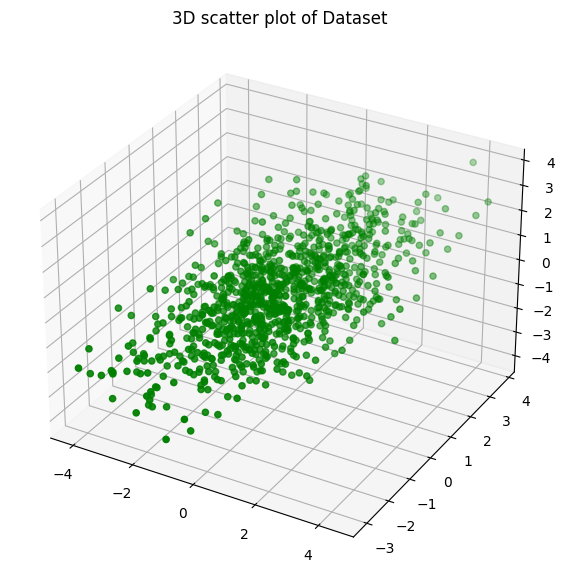

In [3]:
# 가시화를 위한 맷플롯립 figure 만들기
fig = plt.figure(figsize = (10, 7))
# 3차원 공간으로 그래프 구성하기
ax = plt.axes(projection = "3d")

# 3차원 공간에 데이터 가시화
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = "green")
plt.title("3D scatter plot of Dataset")
plt.show()

In [4]:
# 평균을 빼서 데이터 중심을 원점으로 옮김
X_adj = X - X.mean(axis = 0)
# 특이값 분해를 실행함
U, S, Vt = np.linalg.svd(X_adj)
# 주성분을 담고 있는 행렬
Vt.T


array([[ 0.58049416,  0.70475363,  0.40785886],
       [ 0.57671099, -0.00224055, -0.81694517],
       [ 0.57483125, -0.70944859,  0.40773979]])

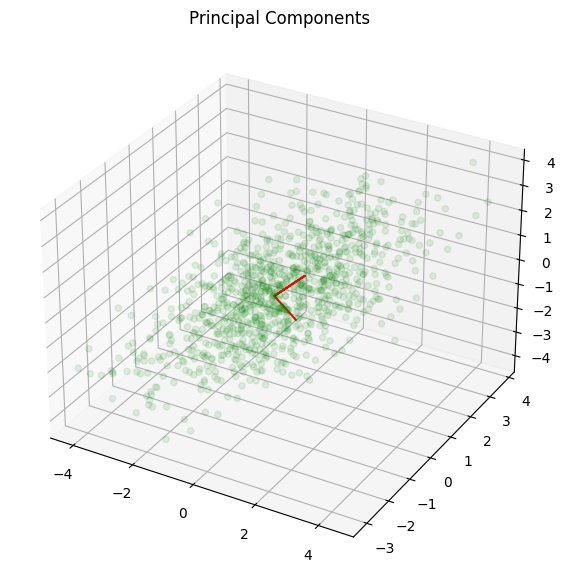

In [5]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection = "3d")
# 데이터 불투명도 0.1로 설정
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = "green", alpha = 0.1)
plt.title("Principal Components")
origin = np.zeros((1,3))

# 주성분을 나타내는 벡터를 그리기 위한 좌표 생성
C = np.concatenate( (origin, Vt[0, :].reshape(-1, 3),
                    origin, Vt[1, :].reshape(-1,3)), axis =0)

# 주성분 직선으로 그리기
ax.plot3D(C[:, 0], C[:,1], C[:,2], color = "red")
plt.show()

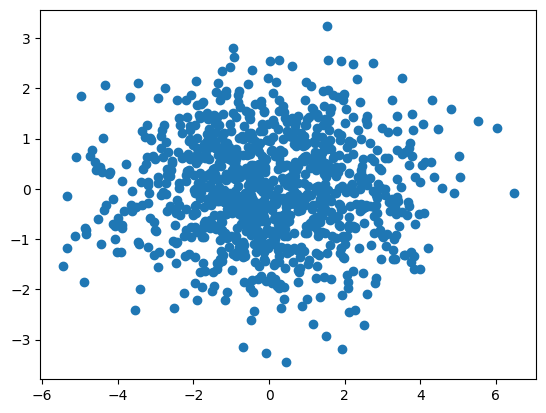

In [6]:
# 2차원 평면에 그리기
W_2d = Vt.T[:, :2]
X_2d = X_adj.dot(W_2d)
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.show()

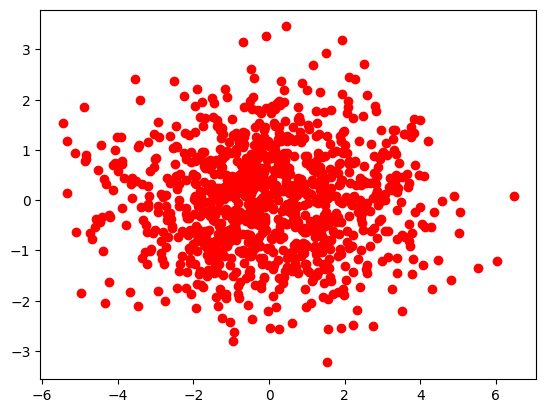

In [7]:
from sklearn.decomposition import PCA
# 2개의 주성분을 찾는 PCA 클래스 객체 pca 생성
pca = PCA(n_components=2)
# 데이터에 대해 평균값을 빼는 처리가 자동으로 이뤄지기에 바로 이 메서드 사용
# transform 메서드를 사용하면 이전에 지정한 차원수만큼 데이터 축소
# X는 이전에 만든 3차원 데이터
X_2d_sklearn = pca.fit_transform(X)
plt.scatter(X_2d_sklearn[:, 0], X_2d_sklearn[:, 1], color='r')
plt.show()

## LAB 11-2 주성분을 추출해 이미지를 압축해 보자
***
실습목표: 주성분은 원래 데이터의 중요한 정보를 담고 있는 축을 추출해 낸다. 따라서 주성분을 얼마나 선택하느냐에 따라 원래의 정보를 얼마나 남길 것인지가 결정된다. 이러한 특성을 이용하여 주성분 분석으로 이미지를 압축하고 복원해 보자.
***

In [8]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터를 학습용, 테스트 데이터로 구분해 받자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_lables), (test_images, test_labels) = \
    fashion_mnist.load_data()
# 트레인 이미지 60000장 테스트 이미지 10000장
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [9]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol, nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:
                axis = ax[i, j]
                axis.get_xaxis().set_visible(False)
                axis.get_yaxis().set_visible(False)
                axis.imshow(img[i*nCol+j], cmap = cmap)

<Figure size 640x480 with 0 Axes>

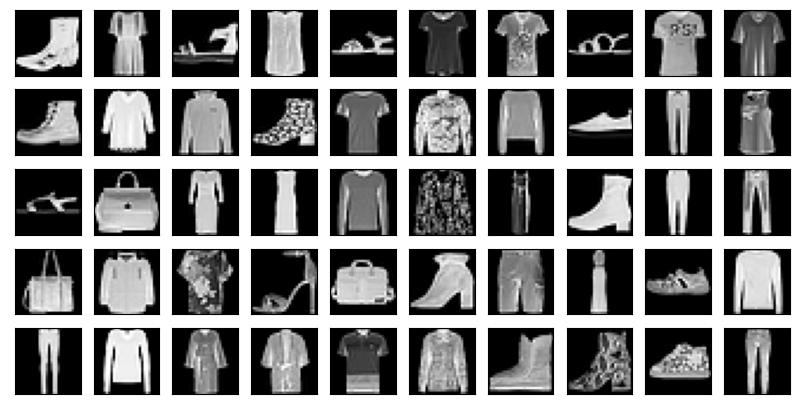

In [10]:
# 트레인 데이터 60000개 가운데 랜덤한 범위의 50개 데이터 그리기
rndinx = np.random.randint(0, len(train_images) -50)
samples = train_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

In [11]:
from sklearn.decomposition import PCA
# 784개의 픽셀로 구성된 데이터
train_images_flat = train_images.reshape(-1, 28*28)
# 주 성분개수 100개로 설정
pca = PCA(n_components=100)
# 100개의 픽셀로 축소
train_reduced = pca.fit_transform(train_images_flat)

<Figure size 640x480 with 0 Axes>

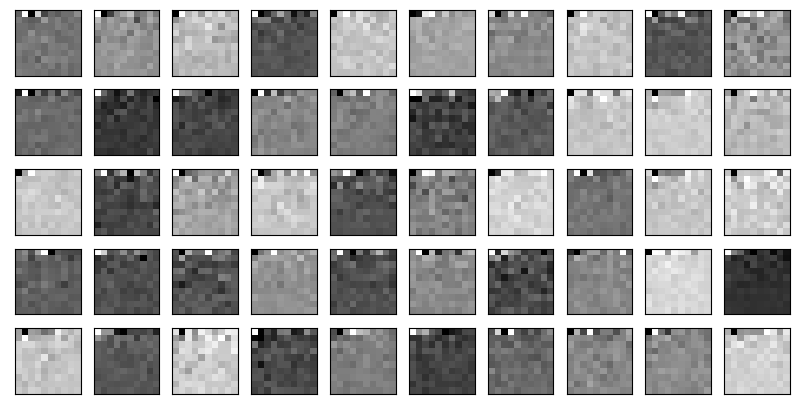

In [12]:
reduced_images = train_reduced.reshape(-1, 10, 10)
plot_images(5, 10, reduced_images[rndinx:rndinx+50])

<Figure size 640x480 with 0 Axes>

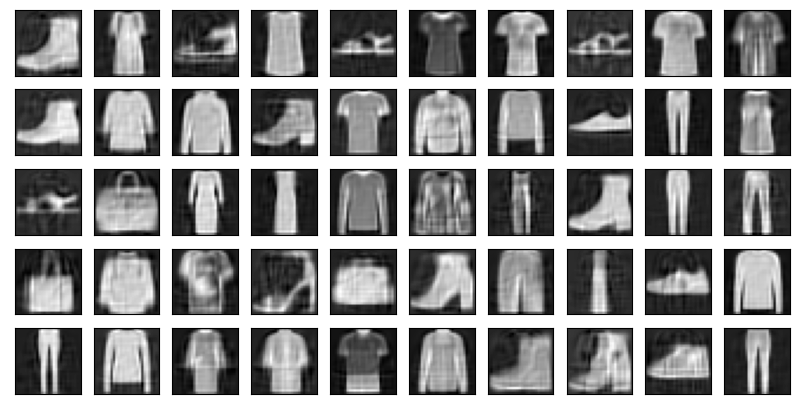

In [13]:
# 데이터 복원 함수 inverse_transform을 사용해 복원
recovered_images = pca.inverse_transform(train_reduced)
recovered_images = recovered_images.reshape(-1, 28, 28)
plot_images(5, 10, recovered_images[rndinx:rndinx+50])

<Figure size 640x480 with 0 Axes>

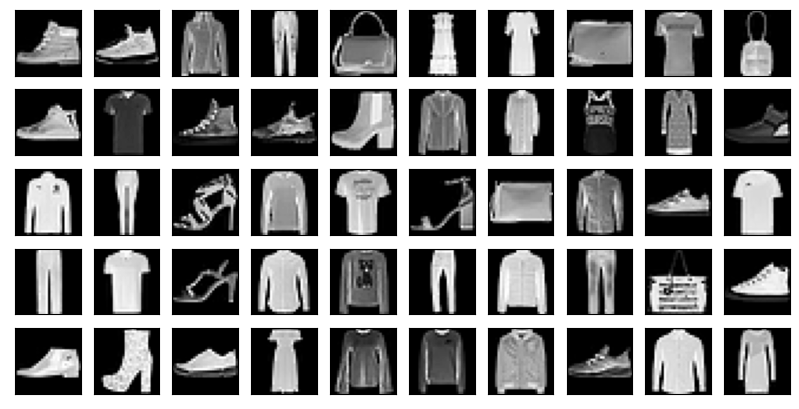

In [14]:
# 훈련과정에 사용되지 않은 데이터 50개를 사용
rndinx = np.random.randint(0, len(test_images) - 50)
samples = test_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

<Figure size 640x480 with 0 Axes>

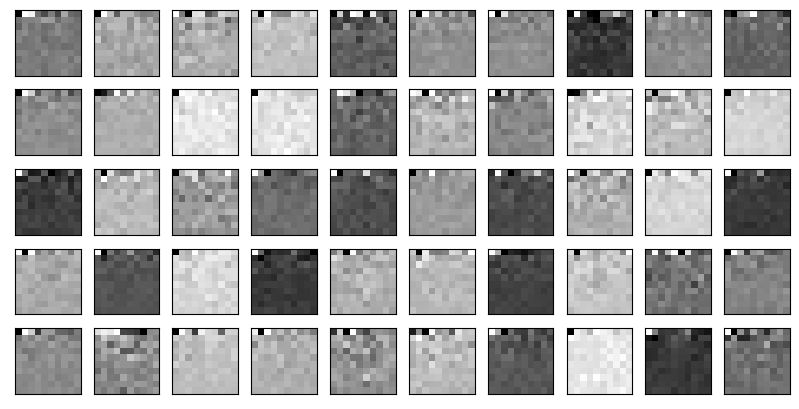

In [15]:
# 이전처럼 차원 축소
test_images_flat = test_images.reshape(-1, 28*28)
test_reduced = pca.fit_transform(test_images_flat)

reduced_images = test_reduced.reshape(-1, 10, 10)
plot_images(5, 10, reduced_images[rndinx:rndinx+50])

<Figure size 640x480 with 0 Axes>

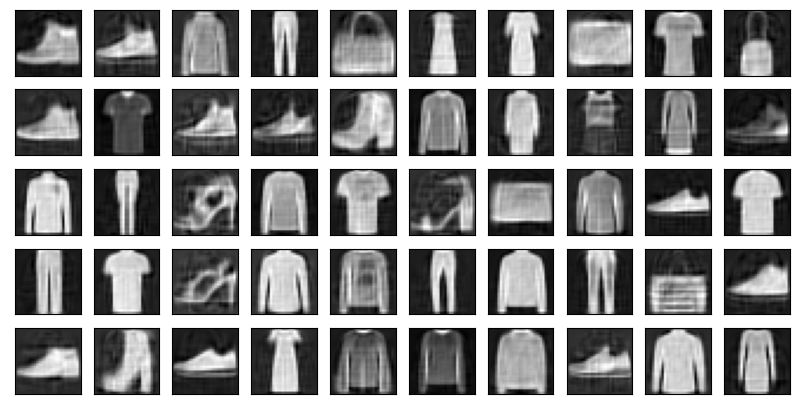

In [16]:
# 축소된 데이터 다시 복원
recovered_images = pca.inverse_transform(test_reduced)
recovered_images = recovered_images.reshape(-1, 28, 28)
plot_images(5, 10, recovered_images[rndinx:rndinx+50])

<Figure size 640x480 with 0 Axes>

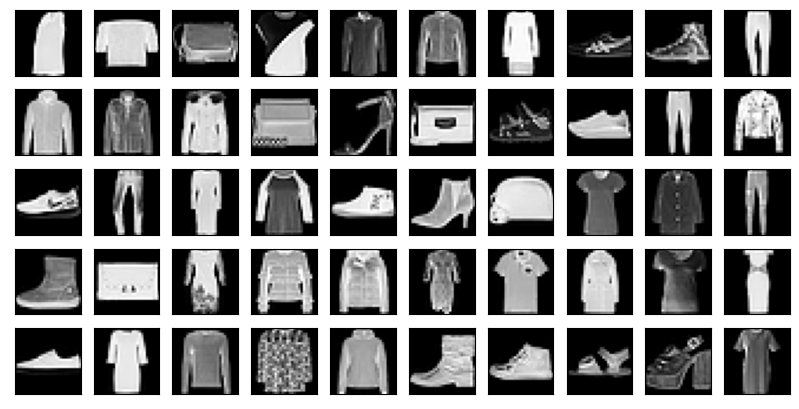

<Figure size 640x480 with 0 Axes>

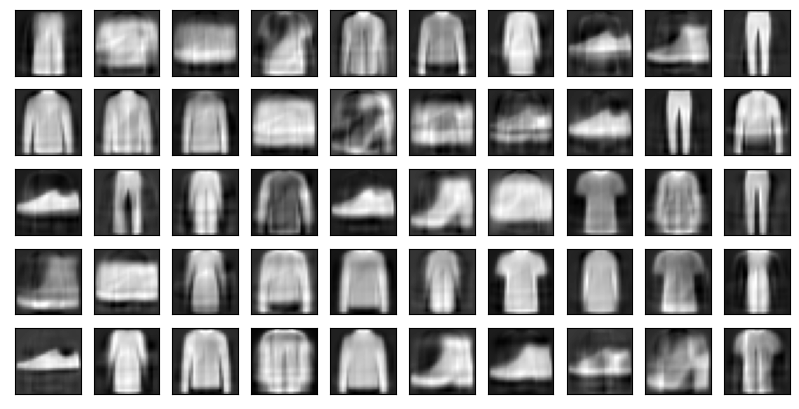

In [17]:
# 50개의 랜덤 데이터 뽑아서 같은 과정 다시 진행
rndinx = np.random.randint(0, len(train_images) - 50)
samples = train_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

train_images_flat = train_images.reshape(-1, 28*28)
pca = PCA(n_components = 25)

train_reduced = pca.fit_transform(train_images_flat)
recovered_images = pca.inverse_transform(train_reduced)

recovered_images = recovered_images.reshape(-1, 28, 28)
plot_images(5, 10, recovered_images[rndinx:rndinx+50])

## LAB 11-3 LLE를 넘파이로만 구현해 보자
***
실습목표: LLE를 구현하여 롤 모양의 데이터를 2차원 공간에 임베딩해 보자
***

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def make_a_roll(num_data):
    # 롤 데이터를 생성
    X = []
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14
    x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data) * 0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data) * 0.01
    y = + np.random.randn(num_data) * 0.3
    r = unit_lengthg = -(2*(unit_length-0.5))**2 + 1
    g = -(2*(unit_length-0.5))**2 + 1
    b = 1-unit_length
    X = np.array( [x, y, z])
    C = np.array([r, g, b])
    return X.T, C.T
    

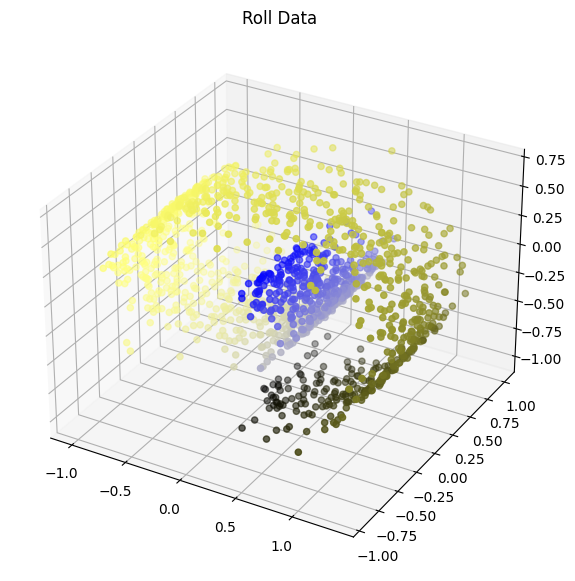

In [19]:
# 1500개의 점으로 롤 데이터 그리기
m = 1500
X, color = make_a_roll(m)

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = color)
plt.title("Roll Data")
plt.show()

In [20]:
W = np.zeros((m, m))

# k-nearest neighbors 생성하기
k = 7
for i in range(m):
    Z = X-X[i,:]
    d_vec = (Z**2).sum(axis = 1)
    neigh = np.argsort(d_vec)[1:k+1]
    
    Zi = np.matrix(Z[neigh, :])
    Gi = Zi.dot(Zi.T)
    correction = np.trace(Gi) * 1e-2
    Gi = Gi + np.eye(k)*correction
    
    Gi_inv = np.linalg.inv(Gi)
    wi = Gi_inv.dot(np.ones(k, ))
    wi /= wi.sum()
    
    W[i, neigh] = wi

In [21]:
I = np.eye(m)
# 특이값 분해를 통해 구함
U, sig, Vt = np.linalg.svd(I - W)
Y = Vt.T

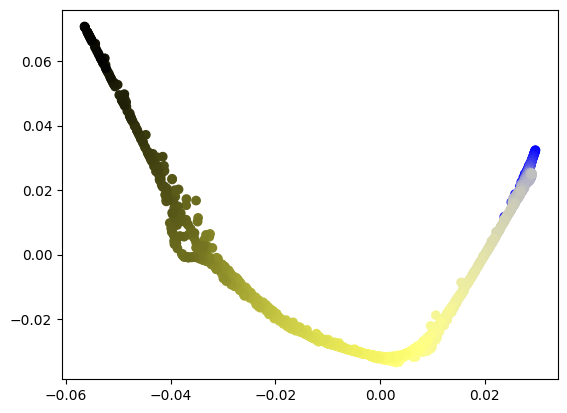

In [22]:
# 마지막 고유벡터 제외
plt.scatter(Y[:, -2], Y[:, -3], color = color)
plt.show()

## LAB 11-4 매니폴드 학습을 이용한 차원 축소 실습
***
실습목표: 무리가 만든 롤 데이터를 매니폴드 학습을 이용하여 2차원 공간으로 옮겨 보자.
***

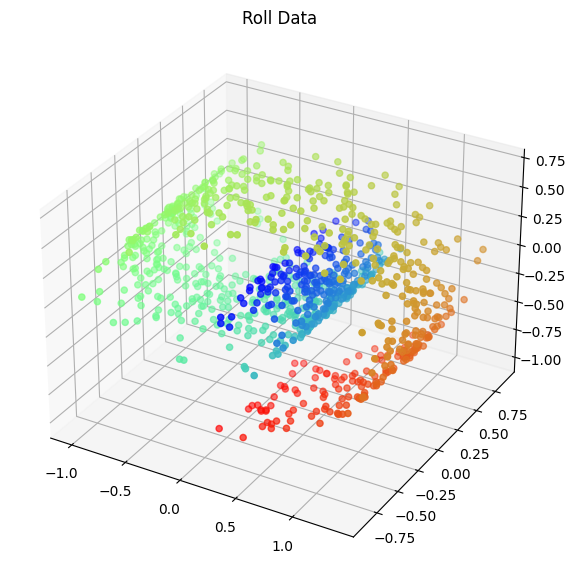

In [23]:
# 이전과 같은 방식으로 롤 데이터 생성
import numpy as np
import matplotlib.pyplot as plt

def make_a_roll(num_data):
    # 롤 데이터 생성
    X = []
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14
    x = np.sin(t) * (unit_length + 0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data) * 0.01
    y = + np.random.randn(num_data) * 0.3
    r = unit_length
    g = -(2*(unit_length - 0.5)) ** 2 + 1
    b = 1-unit_length
    X = np.array([x, y, z])
    C = np.array([r, g, b])
    return X.T, C.T

n_points = 1000
X, color = make_a_roll(n_points)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = color)
plt.title("Roll Data")
plt.show()

In [25]:
from sklearn import manifold

methods = {}
methods['LLE'] = manifold.LocallyLinearEmbedding(n_neighbors = 10,
                                                    n_components=2)
methods['Isomap'] = manifold.Isomap(n_neighbors=10, n_components=2)
methods['t-SNE'] = manifold.TSNE(n_components=2)

In [26]:
embeddings = {}
for _, (name, model) in enumerate(methods.items()):
    embeddings[name] = model.fit_transform(X)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

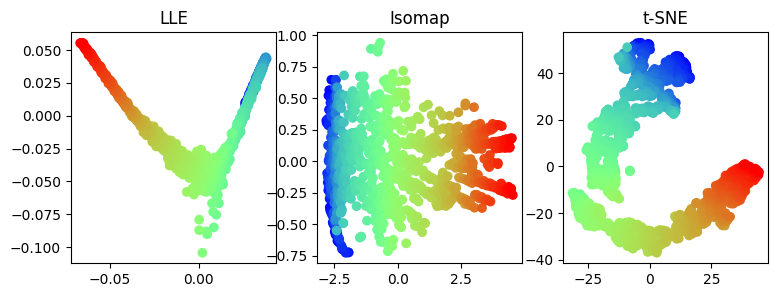

In [27]:
# 1 x N(methods) 서브플롯 준비
fig = plt.figure()
fig.suptitle("Manifold Learning", fontsize=14)
fig, ax = plt.subplots(1, len(methods), figsize = (len(methods)*3, 3))
# 임베딩 결과 그리기
for i, (name, method) in enumerate(methods.items()):
    ax[i].scatter(embeddings[name][:, 0], embeddings[name][:, 1], c=color)
    ax[i].set_title(name)
plt.show()